# AI CA5 Phase 2

In [37]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
import datetime
from sklearn import metrics
from keras.regularizers import l2

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Phase 1

### Reading Dataset

In [3]:
dataset_ = pd.read_csv('A_Z Handwritten Data.csv')

### Organizing Datas

In [4]:
y = dataset_['0']
del dataset_['0']
x = dataset_

In [5]:
x = x.values.tolist()
new_x = pd.DataFrame()
new_x['value'] = x
x = new_x

In [6]:
x

,value
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
372445,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
372446,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
372447,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
372448,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [8]:
print('num of datas:', len(x))
classes = []
for i in range(len(y)):
    if y[i] not in classes:
        classes.append(y[i])
print('num of classes:', len(classes))

num of datas: 372450
num of classes: 26


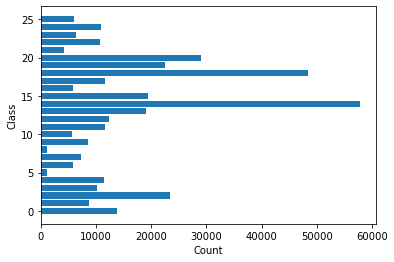

In [9]:
classes_count_dict = {}
for i in range(len(y)):
    if y[i] not in classes_count_dict:
        classes_count_dict[y[i]] = 1
    else:
        classes_count_dict[y[i]] += 1

y_axis = list(classes_count_dict.keys())
x_axis = list(classes_count_dict.values())
plt.barh(y_axis,x_axis)
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

class 0


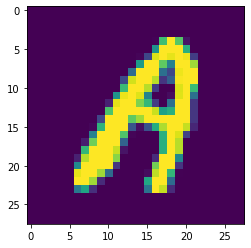

class 1


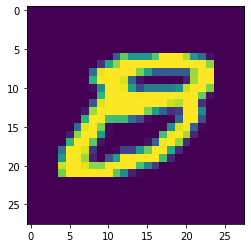

class 2


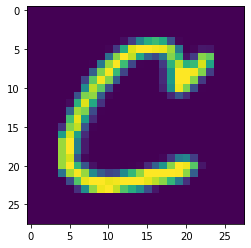

class 3


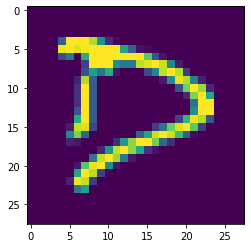

class 4


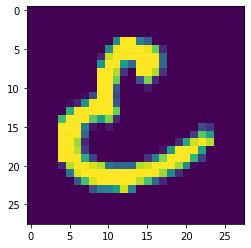

class 5


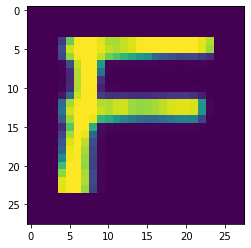

class 6


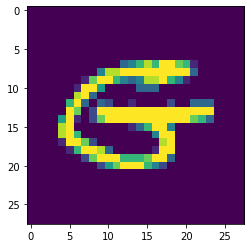

class 7


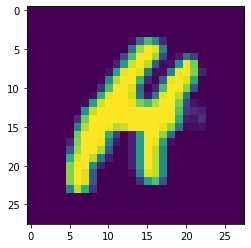

class 8


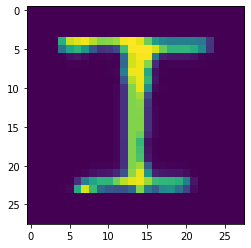

class 9


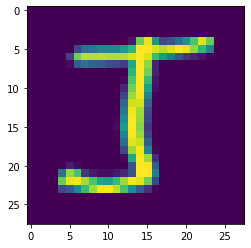

class 10


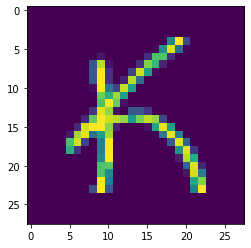

class 11


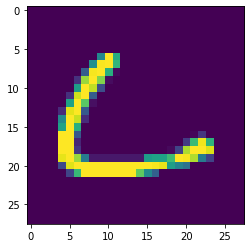

class 12


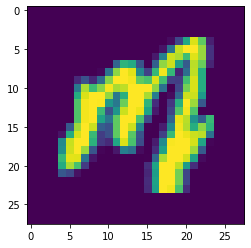

class 13


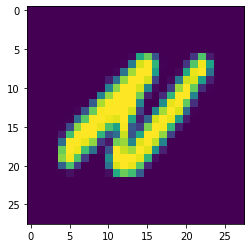

class 14


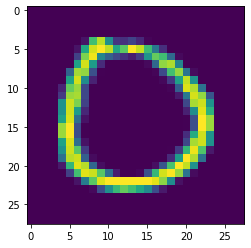

class 15


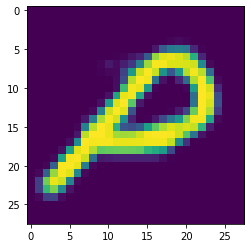

class 16


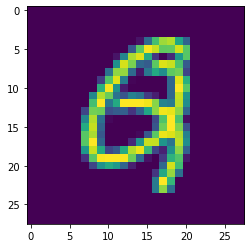

class 17


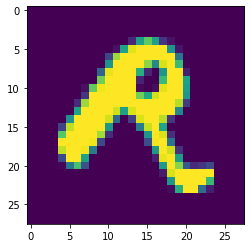

class 18


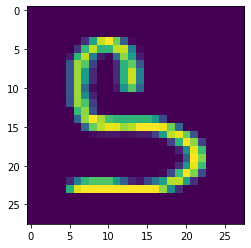

class 19


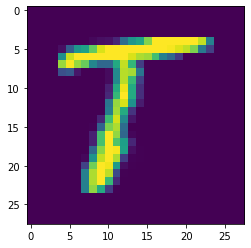

class 20


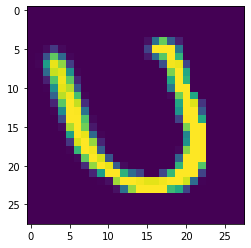

class 21


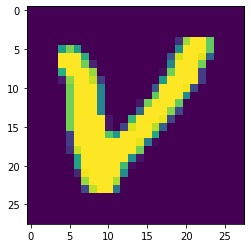

class 22


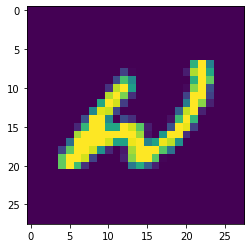

class 23


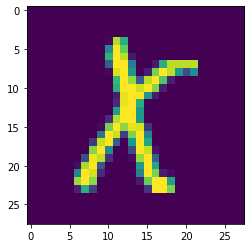

class 24


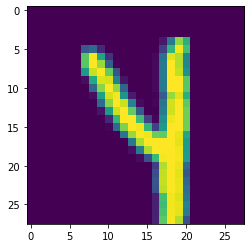

class 25


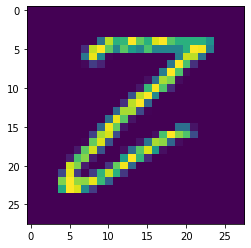

In [10]:
shown_classes = []
for i in range(len(x)):
    if y[i] not in shown_classes:
        print('class',y[i])
        plt.imshow(np.array(x.loc[i].value).reshape(28,28))
        plt.show()
        shown_classes.append(y[i])

### Deviding into train & test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)
x_train = np.array(list(x_train.value))
x_test = np.array(list(x_test.value))

### One hot encoding for y:<br>
we are doing it because in the last layer of network we have neurons according to the number of classes. So due to the fact that each neuron must have a output value, we have to assign 0 to these neurons and 1 to the correct neuron.

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, len(classes))
y_test = tf.keras.utils.to_categorical(y_test, len(classes))

## Phase 2

### Creating the Model

In [93]:
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
#last layer
model.add(layers.Dense(len(classes), activation='softmax'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 200)               157000    
                                                                 
 dropout_16 (Dropout)        (None, 200)               0         
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 26)                2626      
                                                                 
Total params: 179,726
Trainable params: 179,726
Non-tr

### Compiling the Model

In [94]:
loss_func = 'categorical_crossentropy'
optimizer_func = 'SGD'
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

## Phase 3

### Normalizing datas

In [13]:
x_train = x_train/255
x_test = x_test/255

### Part 0:

### Training the Model

In [96]:
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

Epoch 1/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.8650 - accuracy: 0.7599 - val_loss: 0.3734 - val_accuracy: 0.8967
Epoch 2/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.4322 - accuracy: 0.8791 - val_loss: 0.2592 - val_accuracy: 0.9282
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.3392 - accuracy: 0.9044 - val_loss: 0.2085 - val_accuracy: 0.9423
Epoch 4/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.2901 - accuracy: 0.9182 - val_loss: 0.1789 - val_accuracy: 0.9511
Epoch 5/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.2589 - accuracy: 0.9269 - val_loss: 0.1595 - val_accuracy: 0.9560
Epoch 6/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2363 - accuracy: 0.9335 - val_loss: 0.1455 - val_accuracy: 0.9602
Epoch 7/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.2194 - accuracy: 0.9385 - val_loss: 0.1345 - val_ac

In [97]:
print('Training Duration: ', end-start)

Training Duration:  0:05:39.077062


### Evaluating the Model

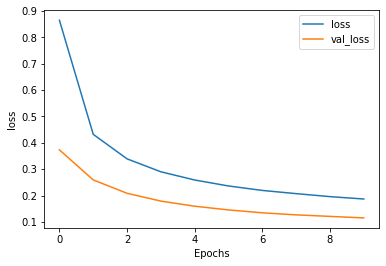

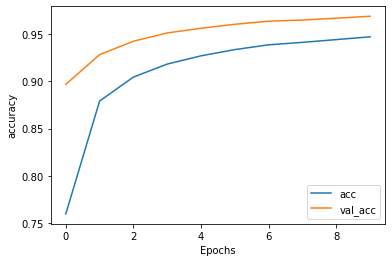

In [98]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

### Train metrics

In [99]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.960     0.978     0.969     11095
           1      0.966     0.954     0.960      6934
           2      0.976     0.978     0.977     18727
           3      0.939     0.921     0.930      8107
           4      0.966     0.955     0.960      9152
           5      0.969     0.916     0.942       930
           6      0.953     0.935     0.944      4610
           7      0.951     0.922     0.936      5774
           8      0.976     0.912     0.943       896
           9      0.946     0.943     0.944      6794
          10      0.941     0.924     0.932      4482
          11      0.965     0.979     0.972      9269
          12      0.971     0.966     0.969      9869
          13      0.960     0.972     0.966     15208
          14      0.977     0.992     0.984     46260
          15      0.982     0.979     0.981     15473
          16      0.973     0.909     0.940      4650
          1

### Test metrics

In [100]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.960     0.973     0.966      2774
           1      0.964     0.945     0.954      1734
           2      0.974     0.974     0.974      4682
           3      0.926     0.921     0.923      2027
           4      0.956     0.955     0.955      2288
           5      0.963     0.897     0.929       233
           6      0.941     0.908     0.924      1152
           7      0.946     0.922     0.934      1444
           8      0.976     0.911     0.942       224
           9      0.946     0.932     0.939      1699
          10      0.930     0.933     0.931      1121
          11      0.966     0.978     0.972      2317
          12      0.960     0.965     0.962      2467
          13      0.956     0.968     0.962      3802
          14      0.976     0.991     0.983     11565
          15      0.981     0.977     0.979      3868
          16      0.966     0.886     0.925      1162
          17

### Using LeakyRelu:

Epoch 1/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.8090 - accuracy: 0.7745 - val_loss: 0.4248 - val_accuracy: 0.8838
Epoch 2/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.4627 - accuracy: 0.8711 - val_loss: 0.3221 - val_accuracy: 0.9126
Epoch 3/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.3862 - accuracy: 0.8926 - val_loss: 0.2723 - val_accuracy: 0.9257
Epoch 4/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.3456 - accuracy: 0.9032 - val_loss: 0.2387 - val_accuracy: 0.9350
Epoch 5/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.3171 - accuracy: 0.9109 - val_loss: 0.2170 - val_accuracy: 0.9405
Epoch 6/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2991 - accuracy: 0.9167 - val_loss: 0.2022 - val_accuracy: 0.9442
Epoch 7/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.2839 - accuracy: 0.9201 - val_loss: 0.1884 - val_ac

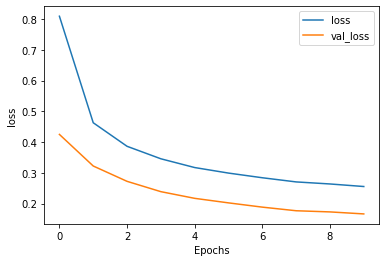

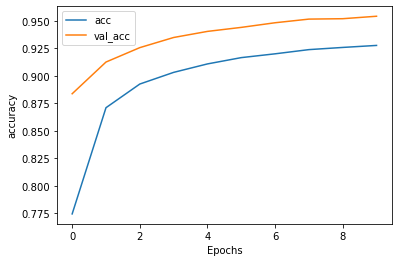

In [101]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'LeakyReLU'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = 'SGD'
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [102]:
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.914     0.961     0.937      2774
           1      0.948     0.910     0.929      1734
           2      0.965     0.961     0.963      4682
           3      0.927     0.841     0.882      2027
           4      0.952     0.928     0.940      2288
           5      0.932     0.880     0.905       233
           6      0.922     0.900     0.911      1152
           7      0.916     0.886     0.901      1444
           8      0.975     0.866     0.917       224
           9      0.914     0.921     0.917      1699
          10      0.913     0.895     0.904      1121
          11      0.955     0.971     0.963      2317
          12      0.936     0.954     0.945      2467
          13      0.949     0.945     0.947      3802
          14      0.957     0.992     0.974     11565
          15      0.961     0.974     0.967      3868
          16      0.952     0.848     0.897      1162
          17

#### So it seems that relu is woring better in this network

### Part 1 (Optimizer):

### Effect of Momentum:<br>
Float hyperparameter >= 0 that accelerates gradient descent in the relevant direction and dampens oscillations. Defaults to 0, i.e., vanilla gradient descent. momentum is an easy and quick way to improve upon standard Stochastic Gradient Descent for optimizing Neural Network models.<br> 
#### Update rule for parameter w with gradient g when momentum is 0:<br>
w = w - learning_rate * g<br>
<br>
#### Update rule when momentum is larger than 0:<br>
velocity = momentum * velocity - learning_rate * g<br>
w = w + velocity<br>

#### Momentum = 0.5

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.6654 - accuracy: 0.8128 - val_loss: 0.2664 - val_accuracy: 0.9265
Epoch 2/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.3257 - accuracy: 0.9076 - val_loss: 0.1853 - val_accuracy: 0.9478
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.2579 - accuracy: 0.9271 - val_loss: 0.1541 - val_accuracy: 0.9571
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.2231 - accuracy: 0.9371 - val_loss: 0.1340 - val_accuracy: 0.9627
Epoch 5/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.2004 - accuracy: 0.9429 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 6/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1847 - accuracy: 0.9475 - val_loss: 0.1137 - val_accuracy: 0.9680
Epoch 7/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1727 - accuracy: 0.9503 - val_loss: 0.1093 - val_ac

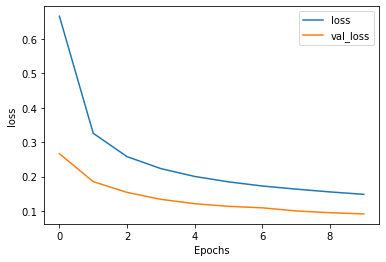

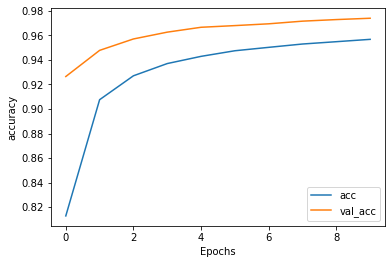

In [14]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [15]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.968     0.986     0.977     11095
           1      0.970     0.971     0.970      6934
           2      0.977     0.984     0.981     18727
           3      0.946     0.949     0.947      8107
           4      0.979     0.962     0.971      9152
           5      0.966     0.942     0.954       930
           6      0.975     0.945     0.960      4610
           7      0.961     0.942     0.952      5774
           8      0.978     0.925     0.951       896
           9      0.971     0.949     0.960      6794
          10      0.954     0.954     0.954      4482
          11      0.979     0.979     0.979      9269
          12      0.970     0.983     0.976      9869
          13      0.973     0.982     0.977     15208
          14      0.986     0.992     0.989     46260
          15      0.987     0.983     0.985     15473
          16      0.978     0.942     0.960      4650
          1

In [16]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.962     0.978     0.970      2774
           1      0.963     0.958     0.961      1734
           2      0.973     0.982     0.977      4682
           3      0.921     0.934     0.927      2027
           4      0.971     0.954     0.963      2288
           5      0.968     0.918     0.943       233
           6      0.971     0.938     0.955      1152
           7      0.956     0.929     0.942      1444
           8      0.976     0.915     0.945       224
           9      0.960     0.936     0.948      1699
          10      0.940     0.944     0.942      1121
          11      0.980     0.981     0.980      2317
          12      0.964     0.976     0.970      2467
          13      0.964     0.978     0.971      3802
          14      0.982     0.988     0.985     11565
          15      0.985     0.981     0.983      3868
          16      0.964     0.927     0.945      1162
          17

#### Momentum = 0.9

Epoch 1/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.4040 - accuracy: 0.8843 - val_loss: 0.1505 - val_accuracy: 0.9583
Epoch 2/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.2172 - accuracy: 0.9371 - val_loss: 0.1215 - val_accuracy: 0.9651
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1811 - accuracy: 0.9473 - val_loss: 0.1044 - val_accuracy: 0.9696
Epoch 4/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1647 - accuracy: 0.9521 - val_loss: 0.1041 - val_accuracy: 0.9699
Epoch 5/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1519 - accuracy: 0.9553 - val_loss: 0.0924 - val_accuracy: 0.9729
Epoch 6/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.1432 - accuracy: 0.9580 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 7/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1355 - accuracy: 0.9598 - val_loss: 0.0846 - val_ac

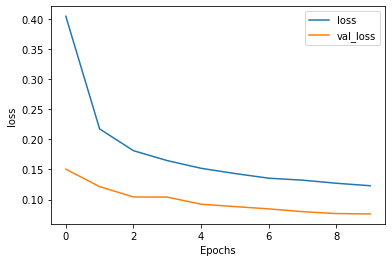

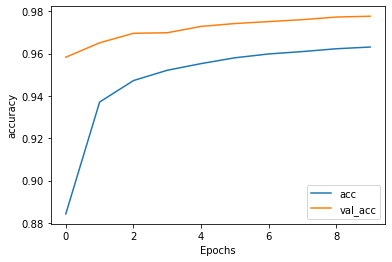

In [18]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [19]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.973     0.992     0.982     11095
           1      0.977     0.981     0.979      6934
           2      0.982     0.990     0.986     18727
           3      0.929     0.975     0.952      8107
           4      0.994     0.967     0.980      9152
           5      0.957     0.980     0.968       930
           6      0.974     0.968     0.971      4610
           7      0.965     0.961     0.963      5774
           8      0.991     0.942     0.966       896
           9      0.959     0.976     0.968      6794
          10      0.974     0.953     0.964      4482
          11      0.986     0.982     0.984      9269
          12      0.988     0.986     0.987      9869
          13      0.979     0.985     0.982     15208
          14      0.992     0.986     0.989     46260
          15      0.989     0.992     0.990     15473
          16      0.983     0.959     0.971      4650
          1

In [20]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.959     0.986     0.972      2774
           1      0.972     0.965     0.969      1734
           2      0.979     0.986     0.982      4682
           3      0.907     0.963     0.934      2027
           4      0.987     0.960     0.973      2288
           5      0.933     0.961     0.947       233
           6      0.966     0.956     0.961      1152
           7      0.961     0.951     0.956      1444
           8      0.995     0.955     0.975       224
           9      0.943     0.961     0.952      1699
          10      0.960     0.942     0.951      1121
          11      0.980     0.980     0.980      2317
          12      0.981     0.977     0.979      2467
          13      0.966     0.981     0.973      3802
          14      0.988     0.982     0.985     11565
          15      0.982     0.988     0.985      3868
          16      0.972     0.940     0.956      1162
          17

#### Momentum = 0.98

Epoch 1/10
9312/9312 [==============================] - 33s 3ms/step - loss: 0.6843 - accuracy: 0.8152 - val_loss: 0.3462 - val_accuracy: 0.9078
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.5498 - accuracy: 0.8616 - val_loss: 0.3208 - val_accuracy: 0.9153
Epoch 3/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.5177 - accuracy: 0.8733 - val_loss: 0.2932 - val_accuracy: 0.9271
Epoch 4/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.5001 - accuracy: 0.8795 - val_loss: 0.2958 - val_accuracy: 0.9249
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.5017 - accuracy: 0.8807 - val_loss: 0.2961 - val_accuracy: 0.9276
Epoch 6/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.5098 - accuracy: 0.8809 - val_loss: 0.3104 - val_accuracy: 0.9185
Epoch 7/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.5106 - accuracy: 0.8820 - val_loss: 0.2917 - val_ac

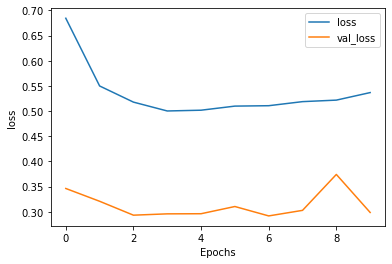

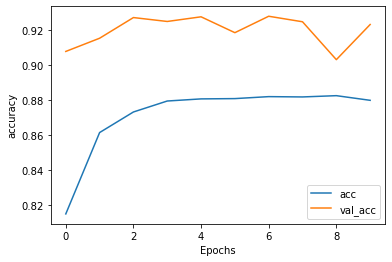

In [21]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.98)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [23]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.896     0.917     0.906     11095
           1      0.975     0.794     0.875      6934
           2      0.957     0.940     0.948     18727
           3      0.928     0.761     0.836      8107
           4      0.885     0.919     0.902      9152
           5      0.956     0.802     0.873       930
           6      0.949     0.798     0.867      4610
           7      0.876     0.837     0.856      5774
           8      0.925     0.790     0.852       896
           9      0.887     0.744     0.809      6794
          10      0.847     0.892     0.869      4482
          11      0.975     0.954     0.964      9269
          12      0.959     0.924     0.941      9869
          13      0.905     0.927     0.916     15208
          14      0.925     0.989     0.956     46260
          15      0.977     0.937     0.956     15473
          16      0.963     0.798     0.873      4650
          1

In [24]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.880     0.919     0.899      2774
           1      0.972     0.777     0.864      1734
           2      0.955     0.940     0.947      4682
           3      0.915     0.756     0.828      2027
           4      0.879     0.914     0.896      2288
           5      0.932     0.708     0.805       233
           6      0.946     0.803     0.869      1152
           7      0.875     0.825     0.849      1444
           8      0.896     0.804     0.847       224
           9      0.877     0.739     0.802      1699
          10      0.838     0.888     0.862      1121
          11      0.969     0.956     0.962      2317
          12      0.954     0.919     0.936      2467
          13      0.889     0.926     0.907      3802
          14      0.926     0.988     0.956     11565
          15      0.980     0.932     0.955      3868
          16      0.959     0.815     0.881      1162
          17

It is obvious that with using momentum, the training decreased and the accuracy increased!<br>
Between three momentum that we analyzed the best one was momentum=0.9<br>
For momentum = 0.5 & 0.98 results was not satisfying!<br>
Here is the link to why momentum=0.9 is better: https://towardsdatascience.com/why-0-9-towards-better-momentum-strategies-in-deep-learning-827408503650

### Adam Optimizer

Epoch 1/10
9312/9312 [==============================] - 33s 4ms/step - loss: 0.3632 - accuracy: 0.8962 - val_loss: 0.1379 - val_accuracy: 0.9601
Epoch 2/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.2063 - accuracy: 0.9407 - val_loss: 0.1168 - val_accuracy: 0.9664
Epoch 3/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1803 - accuracy: 0.9480 - val_loss: 0.1009 - val_accuracy: 0.9720
Epoch 4/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1667 - accuracy: 0.9516 - val_loss: 0.0956 - val_accuracy: 0.9724
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1567 - accuracy: 0.9547 - val_loss: 0.0930 - val_accuracy: 0.9734
Epoch 6/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1490 - accuracy: 0.9570 - val_loss: 0.0857 - val_accuracy: 0.9752
Epoch 7/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.1446 - accuracy: 0.9583 - val_loss: 0.0849 - val_ac

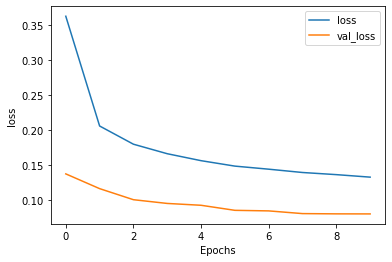

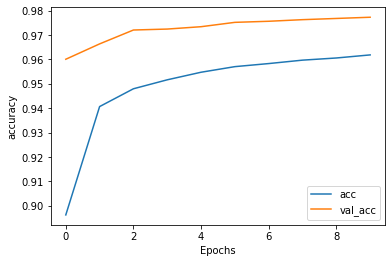

In [25]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [26]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.977     0.991     0.984     11095
           1      0.984     0.956     0.970      6934
           2      0.974     0.992     0.983     18727
           3      0.955     0.958     0.957      8107
           4      0.981     0.974     0.977      9152
           5      0.925     0.985     0.954       930
           6      0.976     0.958     0.967      4610
           7      0.972     0.955     0.964      5774
           8      0.990     0.958     0.973       896
           9      0.980     0.949     0.964      6794
          10      0.957     0.971     0.964      4482
          11      0.983     0.983     0.983      9269
          12      0.986     0.987     0.986      9869
          13      0.977     0.986     0.981     15208
          14      0.989     0.989     0.989     46260
          15      0.992     0.990     0.991     15473
          16      0.984     0.960     0.972      4650
          1

In [27]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.964     0.984     0.974      2774
           1      0.980     0.946     0.963      1734
           2      0.969     0.988     0.978      4682
           3      0.932     0.938     0.935      2027
           4      0.976     0.958     0.967      2288
           5      0.915     0.966     0.939       233
           6      0.972     0.952     0.962      1152
           7      0.962     0.940     0.951      1444
           8      0.991     0.951     0.970       224
           9      0.962     0.931     0.946      1699
          10      0.944     0.963     0.954      1121
          11      0.980     0.981     0.980      2317
          12      0.980     0.978     0.979      2467
          13      0.967     0.983     0.975      3802
          14      0.986     0.985     0.985     11565
          15      0.987     0.985     0.986      3868
          16      0.980     0.948     0.964      1162
          17

Accuracy for Adam ==> 0.977<br>
Accuracy for SGD with Momentum=0.9 ==> 0.978<br>

### Part 2(epoch):

Epoch 1/20
9312/9312 [==============================] - 31s 3ms/step - loss: 0.3571 - accuracy: 0.8977 - val_loss: 0.1448 - val_accuracy: 0.9586
Epoch 2/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.2053 - accuracy: 0.9411 - val_loss: 0.1124 - val_accuracy: 0.9677
Epoch 3/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1795 - accuracy: 0.9486 - val_loss: 0.1048 - val_accuracy: 0.9702
Epoch 4/20
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1646 - accuracy: 0.9519 - val_loss: 0.0959 - val_accuracy: 0.9725
Epoch 5/20
9312/9312 [==============================] - 34s 4ms/step - loss: 0.1562 - accuracy: 0.9551 - val_loss: 0.0928 - val_accuracy: 0.9739
Epoch 6/20
9312/9312 [==============================] - 33s 4ms/step - loss: 0.1492 - accuracy: 0.9566 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 7/20
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1445 - accuracy: 0.9581 - val_loss: 0.0899 - val_ac

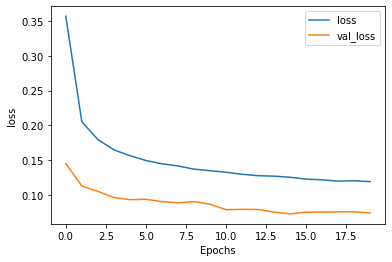

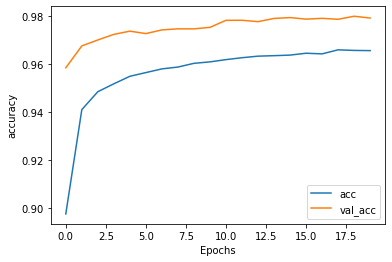

In [28]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [29]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.987     0.992     0.989     11095
           1      0.981     0.983     0.982      6934
           2      0.984     0.993     0.989     18727
           3      0.936     0.981     0.958      8107
           4      0.981     0.985     0.983      9152
           5      0.988     0.966     0.977       930
           6      0.981     0.973     0.977      4610
           7      0.957     0.979     0.968      5774
           8      0.976     0.982     0.979       896
           9      0.965     0.977     0.971      6794
          10      0.977     0.967     0.972      4482
          11      0.989     0.986     0.987      9269
          12      0.991     0.984     0.987      9869
          13      0.986     0.985     0.986     15208
          14      0.995     0.985     0.990     46260
          15      0.994     0.989     0.991     15473
          16      0.971     0.977     0.974      4650
          1

In [30]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.977     0.982     0.980      2774
           1      0.976     0.965     0.970      1734
           2      0.979     0.990     0.984      4682
           3      0.905     0.969     0.936      2027
           4      0.972     0.969     0.970      2288
           5      0.987     0.948     0.967       233
           6      0.977     0.967     0.972      1152
           7      0.947     0.967     0.957      1444
           8      0.956     0.978     0.967       224
           9      0.937     0.968     0.952      1699
          10      0.963     0.962     0.962      1121
          11      0.981     0.985     0.983      2317
          12      0.986     0.973     0.979      2467
          13      0.977     0.983     0.980      3802
          14      0.991     0.979     0.985     11565
          15      0.989     0.984     0.987      3868
          16      0.969     0.961     0.965      1162
          17

As we can see we had a little improvement in accuracy<br><br>
The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters.<br>
Exactly like humans when we want to learn a book we read it more than once, the Network need to iterate on a dataset more than once to update its weights so it can increase its accuracy.<br><br>

Using mode epochs is not helpful allways! it could result in overfitting. some times the network will memorize the train datas so we shouldn't use more epochs allways and we should mind this problem. There is some simple methods to avoid overfitting when using large number of epochs like early-stopping.

### Part 3(Loss Function):

Epoch 1/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0065 - accuracy: 0.8858 - val_loss: 0.0029 - val_accuracy: 0.9515
Epoch 2/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.0038 - accuracy: 0.9348 - val_loss: 0.0024 - val_accuracy: 0.9591
Epoch 3/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0034 - accuracy: 0.9427 - val_loss: 0.0023 - val_accuracy: 0.9613
Epoch 4/10
9312/9312 [==============================] - 35s 4ms/step - loss: 0.0032 - accuracy: 0.9465 - val_loss: 0.0021 - val_accuracy: 0.9659
Epoch 5/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0031 - accuracy: 0.9487 - val_loss: 0.0019 - val_accuracy: 0.9684
Epoch 6/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.0030 - accuracy: 0.9505 - val_loss: 0.0019 - val_accuracy: 0.9695
Epoch 7/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.0030 - accuracy: 0.9518 - val_loss: 0.0019 - val_ac

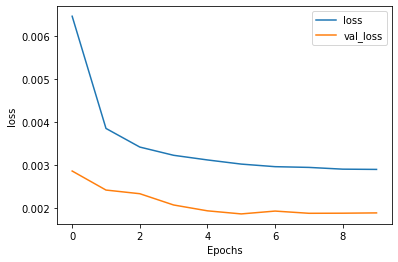

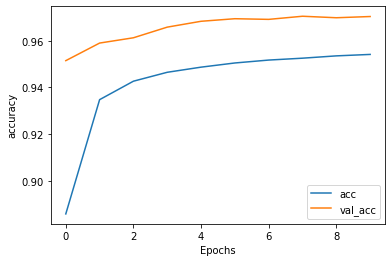

In [31]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'mse'
optimizer_func = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [32]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.970     0.978     0.974     11095
           1      0.960     0.965     0.962      6934
           2      0.967     0.986     0.976     18727
           3      0.952     0.927     0.939      8107
           4      0.987     0.947     0.967      9152
           5      0.950     0.965     0.957       930
           6      0.962     0.946     0.954      4610
           7      0.947     0.935     0.941      5774
           8      0.909     0.961     0.934       896
           9      0.947     0.959     0.953      6794
          10      0.966     0.937     0.951      4482
          11      0.972     0.978     0.975      9269
          12      0.984     0.965     0.974      9869
          13      0.960     0.980     0.970     15208
          14      0.985     0.986     0.986     46260
          15      0.983     0.986     0.985     15473
          16      0.954     0.946     0.950      4650
          1

In [33]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.964     0.967     0.965      2774
           1      0.952     0.954     0.953      1734
           2      0.963     0.985     0.974      4682
           3      0.933     0.904     0.919      2027
           4      0.978     0.942     0.960      2288
           5      0.941     0.953     0.947       233
           6      0.958     0.943     0.950      1152
           7      0.929     0.923     0.926      1444
           8      0.915     0.960     0.937       224
           9      0.927     0.950     0.938      1699
          10      0.953     0.937     0.945      1121
          11      0.972     0.979     0.976      2317
          12      0.981     0.957     0.969      2467
          13      0.949     0.979     0.964      3802
          14      0.981     0.982     0.982     11565
          15      0.983     0.981     0.982      3868
          16      0.945     0.938     0.942      1162
          17

Accuracy for MSE ==> 0.970<br>
Accuracy for Categorical Crossentropy ==> 0.977<br><br>
MSE is not good for Classificaion problems.<br><br>
There are two reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:<br>
First, using MSE means that we assume that the underlying data has been generated from a normal distribution (a bell-shaped curve). In Bayesian terms this means we assume a Gaussian prior. While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution but a Bernoulli distribution.<br>
Secondly, the MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.<br><br>
On a final note, MSE is a good choice for a Cost function when we are doing Linear Regression (i.e fitting a line through data for extrapolation). In the absence of any knowledge of how the data is distributed assuming normal/gaussian distribution is perfectly reasonable.<br><br>
Source: https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7#:~:text=There%20are%20two%20reasons%20why,we%20assume%20a%20Gaussian%20prior

### Part 4(Regularization):

### Without dropout:

Epoch 1/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.2243 - accuracy: 0.9368 - val_loss: 0.1422 - val_accuracy: 0.9580
Epoch 2/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0999 - accuracy: 0.9709 - val_loss: 0.0993 - val_accuracy: 0.9713
Epoch 3/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.0754 - accuracy: 0.9774 - val_loss: 0.0877 - val_accuracy: 0.9747
Epoch 4/10
9312/9312 [==============================] - 26s 3ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 5/10
9312/9312 [==============================] - 27s 3ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0844 - val_accuracy: 0.9761
Epoch 6/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0817 - val_accuracy: 0.9787
Epoch 7/10
9312/9312 [==============================] - 25s 3ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0759 - val_ac

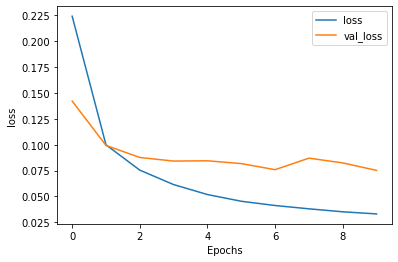

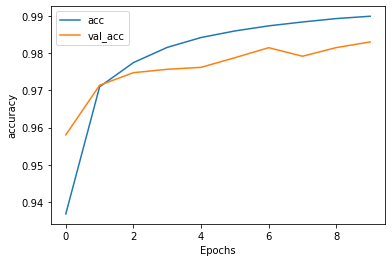

In [34]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func))
model.add(layers.Dense(100, activation=activation_func))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

As it is obvious without dropout we have overfitting problem

In [35]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.980     0.994     0.987     11095
           1      0.989     0.983     0.986      6934
           2      0.986     0.997     0.992     18727
           3      0.971     0.985     0.978      8107
           4      0.996     0.983     0.990      9152
           5      0.969     0.989     0.979       930
           6      0.990     0.987     0.988      4610
           7      0.988     0.961     0.974      5774
           8      0.989     0.961     0.975       896
           9      0.995     0.971     0.983      6794
          10      0.984     0.975     0.979      4482
          11      0.997     0.981     0.989      9269
          12      0.990     0.996     0.993      9869
          13      0.994     0.987     0.991     15208
          14      0.995     0.997     0.996     46260
          15      1.000     0.988     0.994     15473
          16      0.991     0.986     0.989      4650
          1

In [36]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.969     0.987     0.978      2774
           1      0.986     0.964     0.975      1734
           2      0.976     0.993     0.985      4682
           3      0.937     0.968     0.952      2027
           4      0.988     0.967     0.978      2288
           5      0.962     0.974     0.968       233
           6      0.980     0.969     0.974      1152
           7      0.974     0.933     0.953      1444
           8      0.981     0.920     0.949       224
           9      0.989     0.961     0.975      1699
          10      0.958     0.946     0.952      1121
          11      0.995     0.973     0.984      2317
          12      0.981     0.987     0.984      2467
          13      0.986     0.978     0.982      3802
          14      0.989     0.993     0.991     11565
          15      0.996     0.981     0.988      3868
          16      0.972     0.960     0.966      1162
          17

### Adding Regularization<br>
Weight regularization provides an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data, such as the holdout test set.

Epoch 1/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.2860 - accuracy: 0.9359 - val_loss: 0.2134 - val_accuracy: 0.9582
Epoch 2/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.1846 - accuracy: 0.9664 - val_loss: 0.1739 - val_accuracy: 0.9697
Epoch 3/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.1661 - accuracy: 0.9710 - val_loss: 0.1768 - val_accuracy: 0.9677
Epoch 4/10
9312/9312 [==============================] - 34s 4ms/step - loss: 0.1558 - accuracy: 0.9729 - val_loss: 0.1631 - val_accuracy: 0.9707
Epoch 5/10
9312/9312 [==============================] - 36s 4ms/step - loss: 0.1489 - accuracy: 0.9745 - val_loss: 0.1639 - val_accuracy: 0.9704
Epoch 6/10
9312/9312 [==============================] - 39s 4ms/step - loss: 0.1447 - accuracy: 0.9752 - val_loss: 0.1480 - val_accuracy: 0.9747
Epoch 7/10
9312/9312 [==============================] - 42s 4ms/step - loss: 0.1415 - accuracy: 0.9756 - val_loss: 0.1493 - val_ac

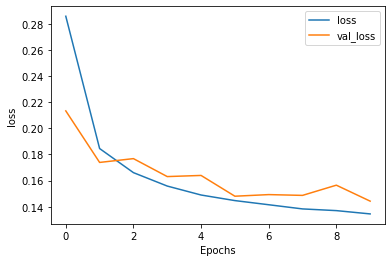

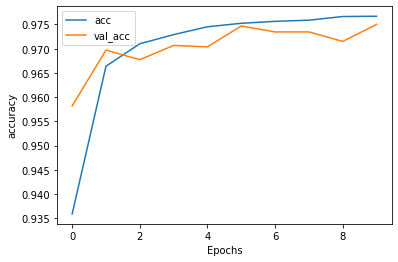

In [38]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
model.add(layers.Dense(100, activation=activation_func, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

As we can see the overfitting problem is decreased!

In [39]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.986     0.979     0.982     11095
           1      0.982     0.955     0.968      6934
           2      0.973     0.993     0.983     18727
           3      0.971     0.901     0.935      8107
           4      0.989     0.963     0.976      9152
           5      0.974     0.968     0.971       930
           6      0.948     0.965     0.957      4610
           7      0.971     0.957     0.964      5774
           8      0.996     0.935     0.965       896
           9      0.949     0.971     0.960      6794
          10      0.965     0.966     0.966      4482
          11      0.989     0.973     0.981      9269
          12      0.980     0.989     0.984      9869
          13      0.968     0.988     0.978     15208
          14      0.973     0.996     0.984     46260
          15      0.990     0.987     0.989     15473
          16      0.987     0.937     0.961      4650
          1

In [40]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.981     0.965     0.973      2774
           1      0.978     0.942     0.960      1734
           2      0.971     0.987     0.979      4682
           3      0.959     0.893     0.925      2027
           4      0.980     0.953     0.967      2288
           5      0.973     0.931     0.952       233
           6      0.940     0.963     0.951      1152
           7      0.957     0.945     0.951      1444
           8      0.991     0.942     0.966       224
           9      0.940     0.964     0.951      1699
          10      0.957     0.955     0.956      1121
          11      0.984     0.973     0.979      2317
          12      0.969     0.987     0.978      2467
          13      0.959     0.986     0.972      3802
          14      0.969     0.995     0.982     11565
          15      0.981     0.984     0.983      3868
          16      0.978     0.929     0.953      1162
          17

### Adding Dropout<br>
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Epoch 1/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.3390 - accuracy: 0.9211 - val_loss: 0.2089 - val_accuracy: 0.9621
Epoch 2/10
9312/9312 [==============================] - 40s 4ms/step - loss: 0.2316 - accuracy: 0.9551 - val_loss: 0.1933 - val_accuracy: 0.9677
Epoch 3/10
9312/9312 [==============================] - 43s 5ms/step - loss: 0.2160 - accuracy: 0.9599 - val_loss: 0.1759 - val_accuracy: 0.9724
Epoch 4/10
9312/9312 [==============================] - 42s 5ms/step - loss: 0.2088 - accuracy: 0.9621 - val_loss: 0.1773 - val_accuracy: 0.9718
Epoch 5/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.2047 - accuracy: 0.9630 - val_loss: 0.1793 - val_accuracy: 0.9707
Epoch 6/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.2012 - accuracy: 0.9636 - val_loss: 0.1790 - val_accuracy: 0.9712
Epoch 7/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.2000 - accuracy: 0.9642 - val_loss: 0.1839 - val_ac

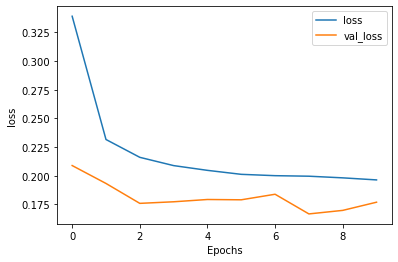

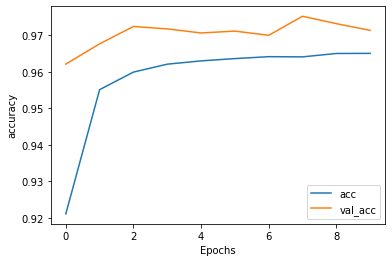

In [43]:
#creating the model
model = tf.keras.Sequential()
activation_func = 'relu'
model.add(layers.Flatten(input_shape = (28*28, 1)))
model.add(layers.Dense(200, activation=activation_func, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation=activation_func, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(len(classes), activation='softmax'))

#compiling the model
loss_func = 'categorical_crossentropy'
optimizer_func = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss_func, optimizer=optimizer_func, metrics=['accuracy'])

#training the model
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data = (x_test, y_test))
end = datetime.datetime.now()

print('Training Duration: ', end-start)

#evaluating the model
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

As we can see the overfitting problem solved!

In [44]:
# train metrics
y_pred = model.predict(x_train)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_train_temp = []
for i in range(len(y_train)):
    train_index = np.argmax(y_train[i])
    y_train_temp.append(train_index)
    
#calculating metrics
print('for train data:')
print(metrics.classification_report(y_train_temp, y_pred_temp, digits=3))

for train data:
              precision    recall  f1-score   support

           0      0.956     0.993     0.974     11095
           1      0.980     0.939     0.959      6934
           2      0.973     0.980     0.977     18727
           3      0.932     0.924     0.928      8107
           4      0.986     0.953     0.970      9152
           5      0.967     0.955     0.961       930
           6      0.926     0.960     0.943      4610
           7      0.974     0.939     0.956      5774
           8      0.933     0.951     0.942       896
           9      0.963     0.933     0.948      6794
          10      0.972     0.947     0.959      4482
          11      0.986     0.971     0.978      9269
          12      0.972     0.986     0.979      9869
          13      0.975     0.979     0.977     15208
          14      0.974     0.993     0.983     46260
          15      0.981     0.986     0.984     15473
          16      0.960     0.936     0.948      4650
          1

In [45]:
# test metrics
y_pred = model.predict(x_test)
y_pred_temp = []
for i in range(len(y_pred)):
    pred_index = np.argmax(y_pred[i])
    y_pred_temp.append(pred_index)
    
y_test_temp = []
for i in range(len(y_test)):
    test_index = np.argmax(y_test[i])
    y_test_temp.append(test_index)
    
#calculating metrics
print('for test data:')
print(metrics.classification_report(y_test_temp, y_pred_temp, digits=3))

for test data:
              precision    recall  f1-score   support

           0      0.948     0.987     0.967      2774
           1      0.974     0.921     0.947      1734
           2      0.968     0.978     0.973      4682
           3      0.913     0.910     0.912      2027
           4      0.983     0.945     0.964      2288
           5      0.935     0.927     0.931       233
           6      0.920     0.957     0.938      1152
           7      0.972     0.930     0.951      1444
           8      0.922     0.955     0.939       224
           9      0.952     0.919     0.935      1699
          10      0.966     0.935     0.950      1121
          11      0.983     0.969     0.976      2317
          12      0.971     0.981     0.976      2467
          13      0.964     0.981     0.973      3802
          14      0.968     0.991     0.980     11565
          15      0.974     0.984     0.979      3868
          16      0.953     0.932     0.942      1162
          17